In [63]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

#import tensorflow as tf

import seaborn as sns
#from sklearn.manifold import TSNE
#from sklearn.decomposition import PCA, TruncatedSVD

#import time

# Classifier Libraries
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#import collections


# Other Librariest

#from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

#from imblearn.under_sampling import NearMiss
#from imblearn.metrics import classification_report_imbalanced
#from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
#from sklearn.model_selection import KFold, StratifiedKFold
#import warnings
#warnings.filterwarnings("ignore")

#from sklearn.model_selection import StratifiedShuffleSplit


In [ ]:

data1 = pd.read_csv('../raw_data/creditcard.csv')
df = data1.copy()

# Remove duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

# Extract transaction hour and apply cyclical transformation
df['Hour'] = (df['Time'] // 3600) % 24
# Apply cyclical transformation
df["Hour_sin"] = np.sin(2 * np.pi * df["Hour"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Hour"] / 24)
df.drop(columns=["Hour", "Time"], inplace=True)

# Define features and labels
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Original class distribution befor SMOTE in first part:", Counter(y))

# Apply BorderlineSMOTE (instead of regular SMOTE)
smote = BorderlineSMOTE(sampling_strategy=0.3, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


print("Original class distribution after SMOTE in first part:", Counter(y_train_smote))

#y_train_smote= pd.DataFrame(y_train_smote)

scaler = RobustScaler()
X_train_smote.iloc[:, 1:29] = scaler.fit_transform(X_train_smote.iloc[:, 1:29])
X_test.iloc[:, 1:29] = scaler.transform(X_test.iloc[:, 1:29])

columns_to_winsorize = ["V8", "V18", "V21", "V27", "V28"]
for col in columns_to_winsorize:
    X_train_smote[col] = winsorize(X_train_smote[col], limits=[0.01, 0.01])
    X_test[col] = winsorize(X_test[col], limits=[0.01, 0.01])

X_train_smote['V20'] = np.log(X_train_smote['V20'].clip(lower=0.0001))
X_train_smote['V23'] = np.log(X_train_smote['V23'].clip(lower=0.0001))
X_test['V20'] = np.log(X_test['V20'].clip(lower=0.0001))
X_test['V23'] = np.log(X_test['V23'].clip(lower=0.0001))

X_train_smote["Amount"] = np.log1p(X_train_smote["Amount"])  # log(1 + Amount) to handle zero values
X_test["Amount"] = np.log1p(X_test["Amount"])  # log(1 + Amount) to handle zero values



scaler = StandardScaler()
X_train_smote["Amount"] = scaler.fit_transform(X_train_smote[["Amount"]])
X_test["Amount"] = scaler.transform(X_test[["Amount"]])

X_train_smote["Amount"] = winsorize(X_train_smote["Amount"], limits=[0.01, 0.01])
X_test["Amount"] = winsorize(X_test["Amount"], limits=[0.01, 0.01])

# Ensure all features are scaled if necessary (PCA is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

"""n_components = 24
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)"""

print("Original class distribution befor BorderlineSMOTE:", Counter(y_train_smote))


# Apply Tomek Links only if class imbalance remains
tomek = TomekLinks()
X_final, y_final = tomek.fit_resample(X_train_scaled, y_train_smote)

# Check final class distribution
print("After Tomek Links:", Counter(y_final))


Original class distribution befor SMOTE in first part: Counter({0: 283253, 1: 473})
Original class distribution after SMOTE in first part: Counter({0: 212439, 1: 63731})
Original class distribution befor BorderlineSMOTE: Counter({0: 212439, 1: 63731})
After Tomek Links: Counter({0: 212432, 1: 63731})


In [67]:
X_test_scaled_df = pd.DataFrame(X_test_scaled)
y_test_df = pd.DataFrame(y_test)

X_test_scaled_df.to_csv('X_test_scaled.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)

In [65]:
X_final.shape

(276163, 31)

In [ ]:
################ 333333333333333333333333333333333

data1 = pd.read_csv('../raw_data/creditcard.csv')
df = data1.copy()
df['Hour'] = (df['Time'] // 3600) % 24






X = df.drop("Class", axis=1)
y = df["Class"]

duplicate_rows = X.duplicated().sum()
X = X.drop_duplicates().reset_index(drop=True)

# Apply cyclical transformation
X["Hour_sin"] = np.sin(2 * np.pi * X["Hour"] / 24)
X["Hour_cos"] = np.cos(2 * np.pi * X["Hour"] / 24)
X.drop(columns=["Hour"], inplace=True)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Original class distribution befor SMOTE in first part:", Counter(y))

# Apply BorderlineSMOTE (instead of regular SMOTE)
smote = BorderlineSMOTE(sampling_strategy=0.3, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


print("Original class distribution after SMOTE in first part:", Counter(y_train_smote))

#y_train_smote= pd.DataFrame(y_train_smote)

scaler = RobustScaler()
X_train_smote.iloc[:, 1:29] = scaler.fit_transform(X_train_smote.iloc[:, 1:29])
X_test.iloc[:, 1:29] = scaler.transform(X_test.iloc[:, 1:29])

columns_to_winsorize = ["V8", "V18", "V21", "V27", "V28"]
for col in columns_to_winsorize:
    X_train_smote[col] = winsorize(X_train_smote[col], limits=[0.01, 0.01])
    X_test[col] = winsorize(X_test[col], limits=[0.01, 0.01])

X_train_smote['V20'] = np.log(X_train_smote['V20'].clip(lower=0.0001))
X_train_smote['V23'] = np.log(X_train_smote['V23'].clip(lower=0.0001))
X_test['V20'] = np.log(X_test['V20'].clip(lower=0.0001))
X_test['V23'] = np.log(X_test['V23'].clip(lower=0.0001))

X_train_smote["Amount"] = np.log1p(X_train_smote["Amount"])  # log(1 + Amount) to handle zero values
X_test["Amount"] = np.log1p(X_test["Amount"])  # log(1 + Amount) to handle zero values



scaler = StandardScaler()
X_train_smote["Amount"] = scaler.fit_transform(X_train_smote[["Amount"]])
X_test["Amount"] = scaler.transform(X_test[["Amount"]])

X_train_smote["Amount"] = winsorize(X_train_smote["Amount"], limits=[0.01, 0.01])
X_test["Amount"] = winsorize(X_test["Amount"], limits=[0.01, 0.01])

# Ensure all features are scaled if necessary (PCA is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

"""n_components = 24
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)"""

print("Original class distribution befor BorderlineSMOTE:", Counter(y_train_smote))


# Apply Tomek Links only if class imbalance remains
tomek = TomekLinks()
X_final, y_final = tomek.fit_resample(X_train_scaled, y_train_smote)

# Check final class distribution
print("After Tomek Links:", Counter(y_final))


In [2]:
data1 = pd.read_csv('../raw_data/creditcard.csv')
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df = data1.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Check for Missing Values

In [7]:
df.isnull().sum().sum()

0

## Check for Duplicates
Duplicate records can cause bias in modeling.

In [8]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 1081


### remove them

In [9]:
df = df.drop_duplicates().reset_index(drop=True)
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


## Converting time to Hour

In [11]:
df['Hour'] = (df['Time'] // 3600) % 24

## Apply cyclical transformation

In [12]:
# Apply cyclical transformation
df["Hour_sin"] = np.sin(2 * np.pi * df["Hour"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Hour"] / 24)

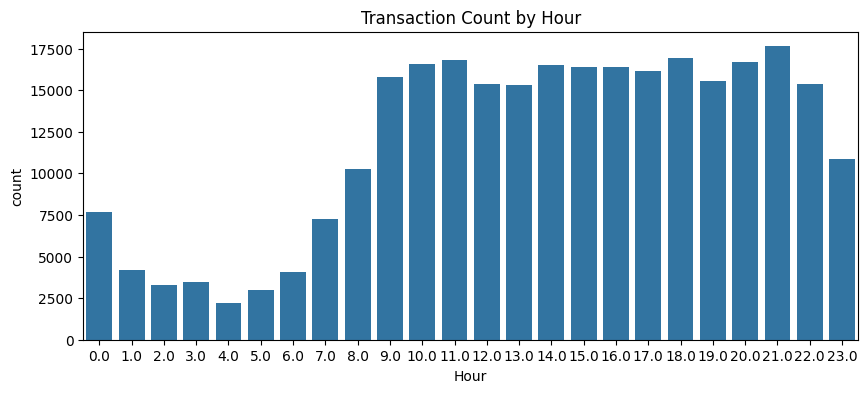

In [13]:
# Plot the number of transactions by Hour
plt.figure(figsize=(10, 4))
sns.countplot(x=df['Hour'])
plt.title("Transaction Count by Hour")
plt.show()

In [14]:
df["Hour"].value_counts().sort_index()

0.0      7647
1.0      4208
2.0      3308
3.0      3487
4.0      2204
5.0      2988
6.0      4082
7.0      7233
8.0     10232
9.0     15767
10.0    16548
11.0    16781
12.0    15378
13.0    15323
14.0    16520
15.0    16374
16.0    16396
17.0    16130
18.0    16959
19.0    15566
20.0    16705
21.0    17629
22.0    15378
23.0    10883
Name: Hour, dtype: int64

## Drop the original "Hour" column after transformation.

In [15]:
df.drop(columns=["Hour"], inplace=True)

In [16]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour_sin', 'Hour_cos'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 33 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Time      283726 non-null  float64
 1   V1        283726 non-null  float64
 2   V2        283726 non-null  float64
 3   V3        283726 non-null  float64
 4   V4        283726 non-null  float64
 5   V5        283726 non-null  float64
 6   V6        283726 non-null  float64
 7   V7        283726 non-null  float64
 8   V8        283726 non-null  float64
 9   V9        283726 non-null  float64
 10  V10       283726 non-null  float64
 11  V11       283726 non-null  float64
 12  V12       283726 non-null  float64
 13  V13       283726 non-null  float64
 14  V14       283726 non-null  float64
 15  V15       283726 non-null  float64
 16  V16       283726 non-null  float64
 17  V17       283726 non-null  float64
 18  V18       283726 non-null  float64
 19  V19       283726 non-null  float64
 20  V20 

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour_sin,Hour_cos
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,1.0


In [19]:
df["Class"].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [20]:
print('Not Fraud', round(df['Class'].value_counts()[0]/len(df) * 100,2))
print('Fraud', round(df['Class'].value_counts()[1]/len(df) * 100,2))

Not Fraud 99.83
Fraud 0.17


/tmp/ipykernel_140661/1504061036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=["red", "blue"])


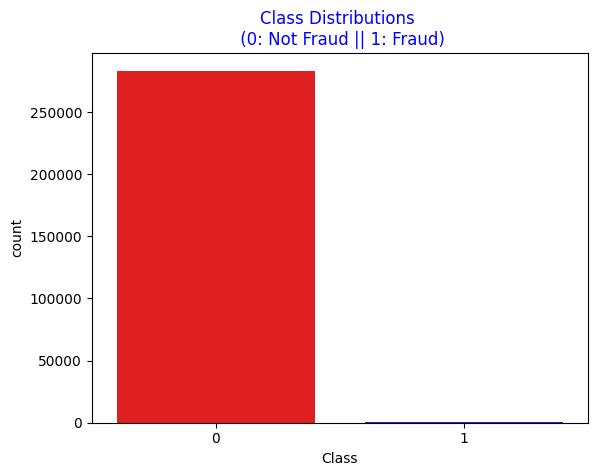

In [21]:
# Assuming 'df' is your pandas DataFrame
sns.countplot(x='Class', data=df, palette=["red", "blue"])
plt.title('Class Distributions \n (0: Not Fraud || 1: Fraud)', fontsize=12, color="Blue")
plt.show() #add this line to display the plot.

In [22]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [24]:
print("Original class distribution befor SMOTE in first part:", Counter(y))

Original class distribution befor SMOTE in first part: Counter({0: 283253, 1: 473})


## 🔍 Why Use BorderlineSMOTE & Tomek Links?
Using BorderlineSMOTE & Tomek Links together has specific advantages:

## BorderlineSMOTE Instead of Regular SMOTE
- **Regular SMOTE** generates synthetic minority samples randomly, which may cause overlapping between classes.
- **BorderlineSMOTE** only generates synthetic samples near the decision boundary, making the classifier more robust in distinguishing fraud from non-fraud cases.
- It is useful when fraud cases are rare and close to the class boundary.

In [25]:
# Apply BorderlineSMOTE (instead of regular SMOTE)
smote = BorderlineSMOTE(sampling_strategy=0.3, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\nClass distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts())



Class distribution after SMOTE:
 0    226602
1     67980
Name: Class, dtype: int64


/tmp/ipykernel_140661/1370972371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.Series(y_train_smote).value_counts().index,


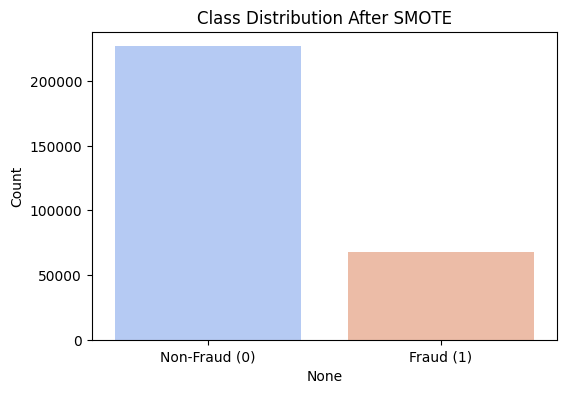

In [26]:
# Plot new class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=pd.Series(y_train_smote).value_counts().index,
            y=pd.Series(y_train_smote).value_counts().values, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Non-Fraud (0)", "Fraud (1)"])
plt.ylabel("Count")
plt.title("Class Distribution After SMOTE")
plt.show()

In [27]:
print("Original class distribution after SMOTE in first part:", Counter(y_train_smote))

Original class distribution after SMOTE in first part: Counter({0: 226602, 1: 67980})


In [28]:
print('Not Fraud', round(y_train_smote.value_counts()[0]/len(y_train_smote) * 100,2))
print('Fraud', round(y_train_smote.value_counts()[1]/len(y_train_smote) * 100,2))

Not Fraud 76.92
Fraud 23.08


# If recall is too low, should increase sampling_strategy to 0.3 or 0.5`.

In [29]:
X_train_smote.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Hour_sin', 'Hour_cos'],
      dtype='object')

## Handling Extreme Outliers
The describe() output shows some extreme values in the V columns (e.g., V6 max = 73.3, V7 max = 120.6, etc.).

The Amount column also has a high max value (25691.16), which could indicate some large transaction outliers.

## Visualizing Outliers
Plot boxplots to identify extreme values:

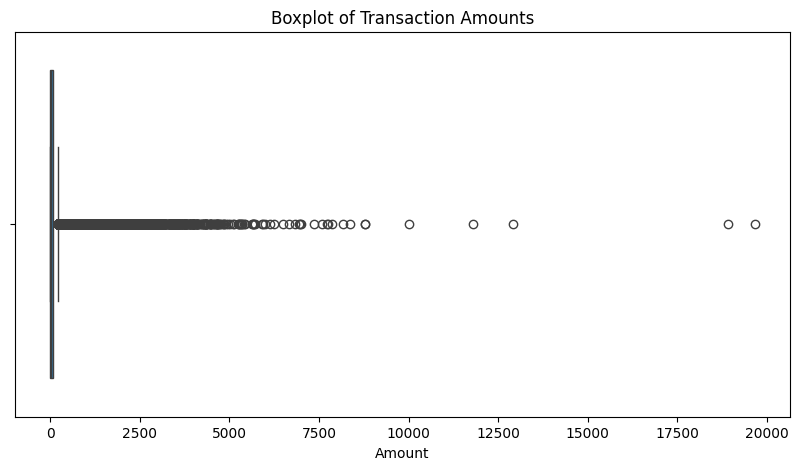

In [30]:
# Plot boxplot for Amount
plt.figure(figsize=(10,5))
sns.boxplot(x=X_train_smote["Amount"])
plt.title("Boxplot of Transaction Amounts")
plt.show()


## Plot a histogram for the Amount featueres

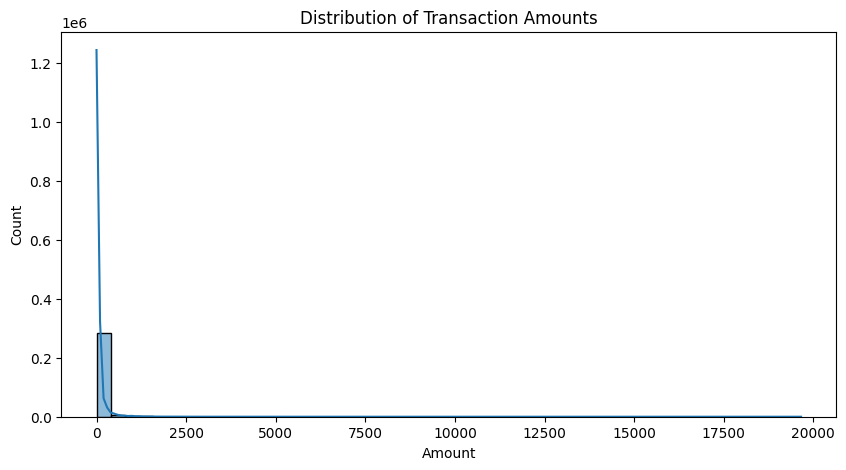

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(X_train_smote["Amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()

## Plot a histogram for the V features

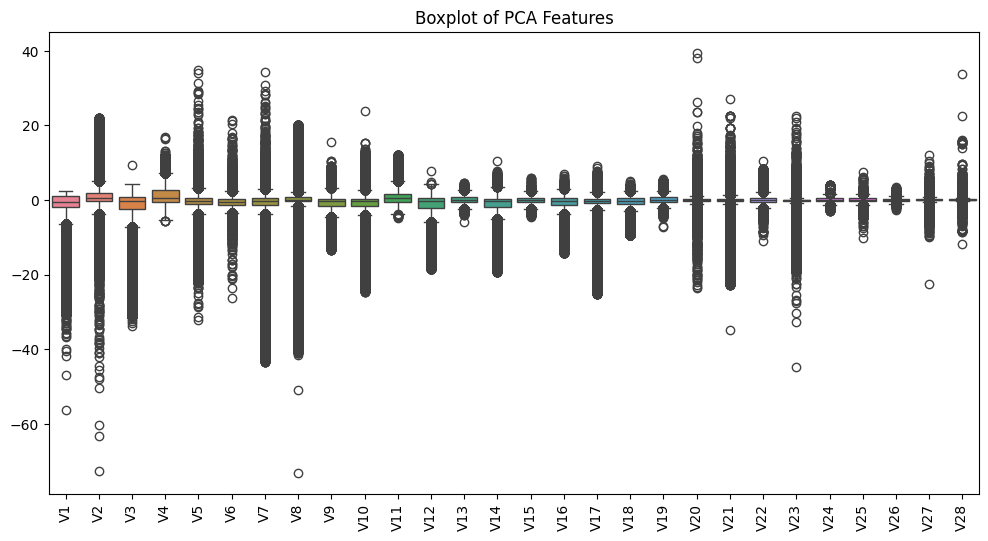

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_smote.iloc[:, 1:29])  # Excluding 'Time', 'Amount', 'Hour', 'Class'
plt.xticks(rotation=90)
plt.title("Boxplot of PCA Features")
plt.show()


In [33]:
scaler = RobustScaler()
X_train_smote.iloc[:, 1:29] = scaler.fit_transform(X_train_smote.iloc[:, 1:29])
X_test.iloc[:, 1:29] = scaler.transform(X_test.iloc[:, 1:29])

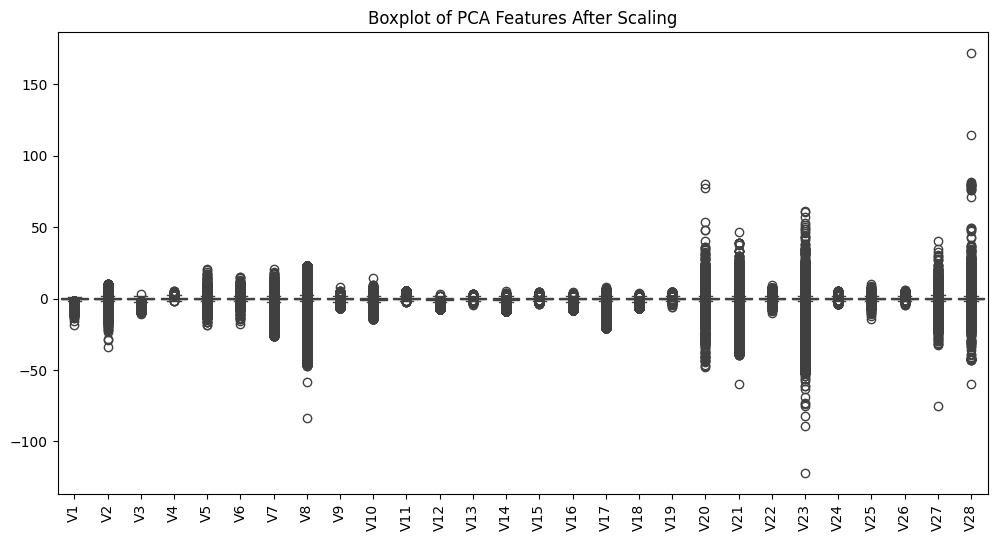

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_smote.iloc[:, 1:29])  # Check V1-V28 again
plt.xticks(rotation=90)
plt.title("Boxplot of PCA Features After Scaling")
plt.show()

## Winsorization Approach

In [35]:
from scipy.stats.mstats import winsorize

columns_to_winsorize = ["V8", "V21", "V27", "V28"]

for col in columns_to_winsorize:
    X_train_smote[col] = winsorize(X_train_smote[col], limits=[0.01, 0.01])
    X_test[col] = winsorize(X_test[col], limits=[0.01, 0.01])

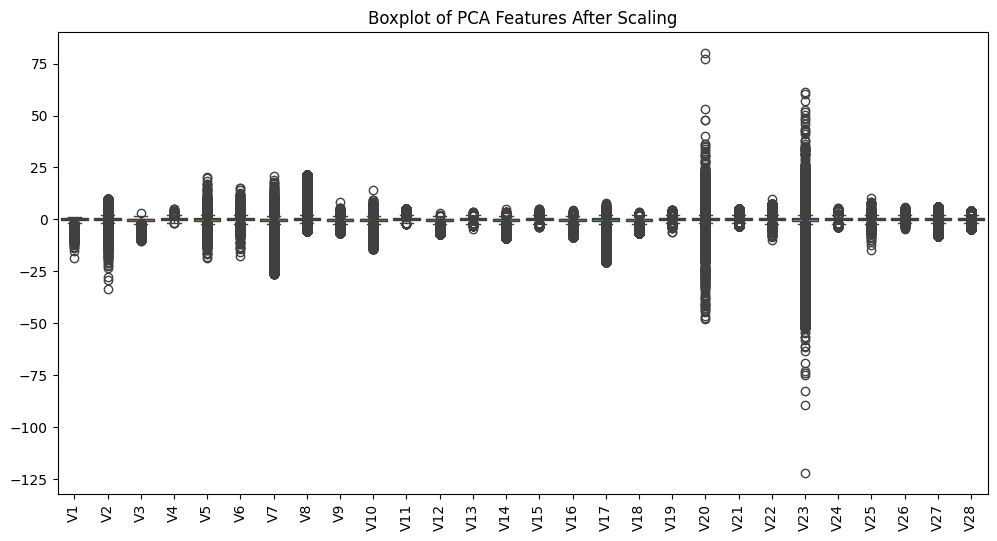

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_smote.iloc[:, 1:29])  # Check V1-V28 again
plt.xticks(rotation=90)
plt.title("Boxplot of PCA Features After Scaling")
plt.show()

## Check for negative values in 'Amount'

In [37]:
# Check for negative values in 'Amount'
negative_values = X_train_smote[X_train_smote['Amount'] < 0]
print(negative_values)


Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Hour_sin, Hour_cos]
Index: []

[0 rows x 32 columns]


## Checking the negative values in Amount, Time, Hour

In [38]:
print("Negative values in Amount:", (X_train_smote["Amount"] < 0).sum())
print("Negative values in Time:", (X_train_smote["Time"] < 0).sum())


Negative values in Amount: 0
Negative values in Time: 0


In [39]:
missing_values = pd.DataFrame(X_train_smote, columns=X.columns).isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [40]:
print(X_train_smote[['V20', 'V23']].describe())
print((X_train_smote[['V20', 'V23']] <= 0).sum())

                 V20           V23
count  294582.000000  2.945820e+05
mean        0.299858 -1.831178e-01
std         1.801278  2.448564e+00
min       -47.979809 -1.220784e+02
25%        -0.361163 -5.470933e-01
50%         0.000000 -9.462417e-18
75%         0.638837  4.529067e-01
max        80.090866  6.157028e+01
V20    147291
V23    147291
dtype: int64


## Log Transformation for V23 & V20

In [41]:
X_train_smote['V20'] = np.log(X_train_smote['V20'].clip(lower=0.0001))
X_train_smote['V23'] = np.log(X_train_smote['V23'].clip(lower=0.0001))

X_test['V20'] = np.log(X_test['V20'].clip(lower=0.0001))
X_test['V23'] = np.log(X_test['V23'].clip(lower=0.0001))

In [42]:
print(X_train_smote.isnull().sum()[X_train_smote.isnull().sum() > 0])

Series([], dtype: int64)


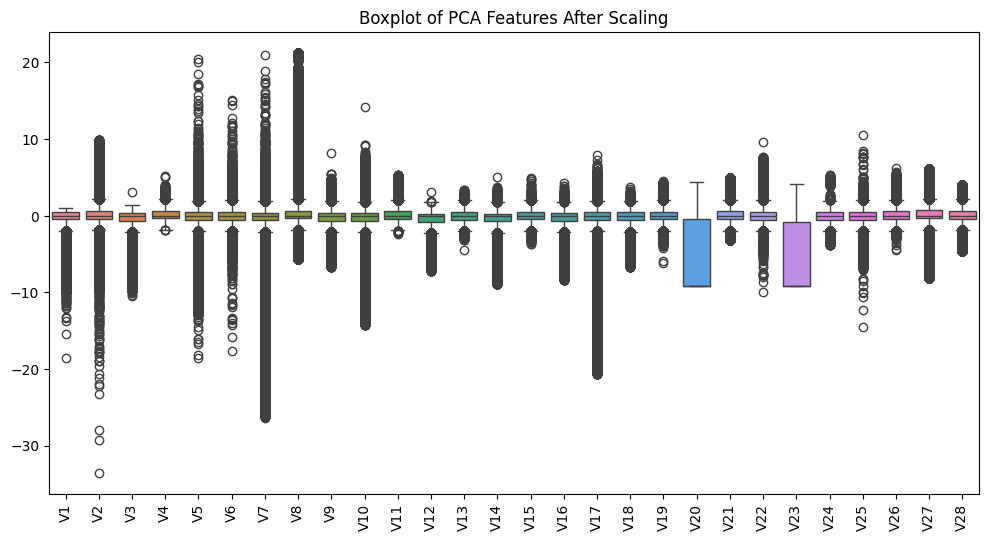

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_smote.iloc[:, 1:29])  # Check V1-V28 again
plt.xticks(rotation=90)
plt.title("Boxplot of PCA Features After Scaling")
plt.show()

# Dealing with amount column
## 1- Direct Log Transformation 

In [44]:
X_train_smote["Amount"] = np.log1p(X_train_smote["Amount"])  # log(1 + Amount) to handle zero values
X_test["Amount"] = np.log1p(X_test["Amount"])  # log(1 + Amount) to handle zero values

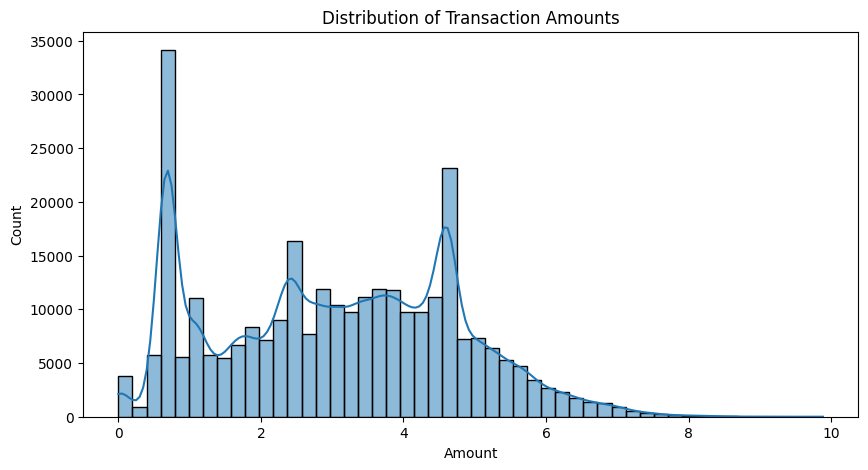

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(X_train_smote["Amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()

## 2- Log Transform + Scaling

In [46]:
scaler = StandardScaler()
X_train_smote["Amount"] = scaler.fit_transform(X_train_smote[["Amount"]])
X_test["Amount"] = scaler.transform(X_test[["Amount"]])

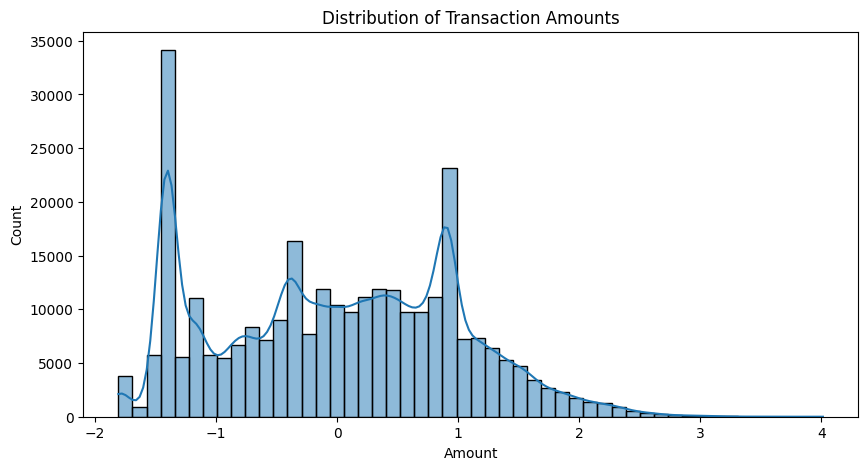

In [47]:
plt.figure(figsize=(10, 5))
sns.histplot(X_train_smote["Amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()

In [48]:
X_train_smote["Amount"] = winsorize(X_train_smote["Amount"], limits=[0.01, 0.01])
X_test["Amount"] = winsorize(X_test["Amount"], limits=[0.01, 0.01])

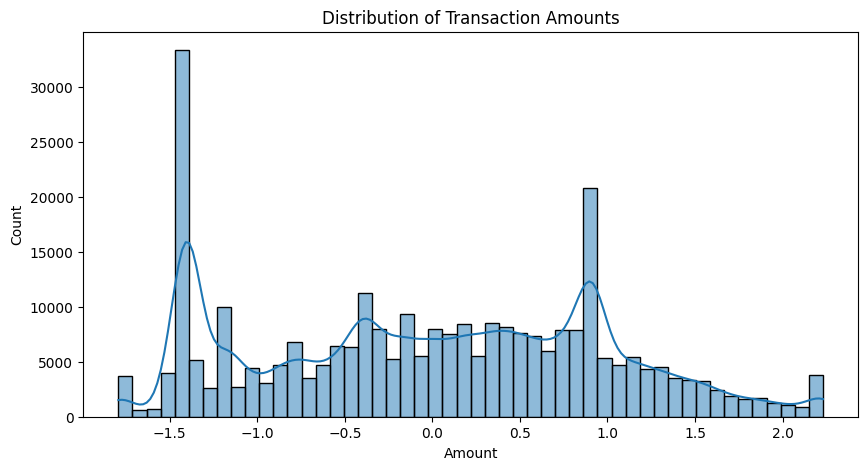

In [49]:
plt.figure(figsize=(10, 5))
sns.histplot(X_train_smote["Amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()

## Prepare the Data for Principal Component Analysis (PCA) 

In [50]:
# Ensure all features are scaled if necessary (PCA is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [51]:
print(f"Original shape: {X_train_smote.shape}")
print(f"After shape: {X_train_scaled.shape}")

Original shape: (294582, 32)
After shape: (294582, 32)


In [52]:
missing_values = pd.DataFrame(X_train_scaled, columns=X.columns).isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [53]:
print(np.isnan(X_train_scaled).sum())

0


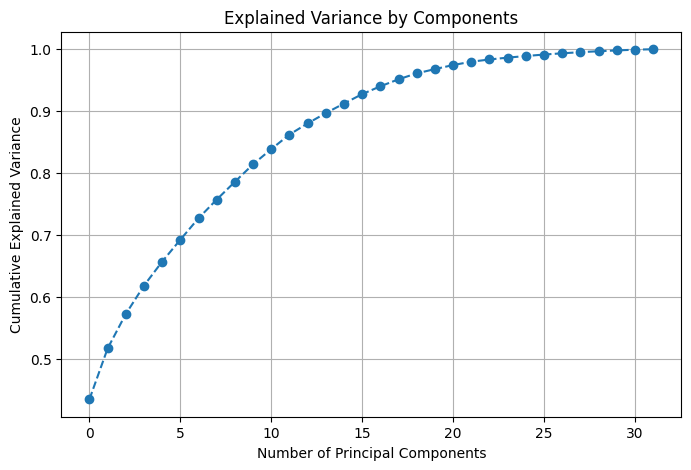

In [53]:
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid()
plt.show()

In [54]:
n_components = 20
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [55]:
print(f"The shape: {X_train_pca.shape}")

The shape: (294582, 20)


In [56]:
print("Original class distribution befor BorderlineSMOTE:", Counter(y_train_smote))


Original class distribution befor BorderlineSMOTE: Counter({0: 226602, 1: 67980})


## **Tomek** Links for Noise Reduction
- 1- Tomek Links removes overlapping majority class samples that are too close to fraud cases.
- 2- This sharpens the decision boundary, reducing noise and improving classification.
- 3- However, if Tomek Links removes too many non-fraud samples, it may weaken the model.

### 📌 When to use Tomek Links?
- ✔ If you want a cleaner dataset
- ✔ If your classifier is overfitting due to overlapping samples

### 📌 When NOT to use it?
- ✖ If after SMOTE, you already have a well-balanced dataset
- ✖ If removing non-fraud samples hurts model performance

- ➡ In your case, Tomek Links did not remove any samples, meaning it didn’t find overlapping non-fraud cases to remove, so it was harmless.

In [57]:
# Then, apply Tomek Links to remove borderline majority class samples
# Apply Tomek Links only if class imbalance remains
tomek = TomekLinks()
X_final, y_final = tomek.fit_resample(X_train_pca, y_train_smote)

# Check new class distribution
print("Class distribution after resampling:", Counter(y_final))

Class distribution after resampling: Counter({0: 226590, 1: 67980})


In [58]:
# Check final class distribution
print("After Tomek Links:", Counter(y_final))

After Tomek Links: Counter({0: 226590, 1: 67980})


In [59]:
print(f"The shape: {X_final.shape}")
print(f"The shape: {X_test_pca.shape}")

The shape: (294570, 20)
The shape: (56746, 20)


The shape: (56746, 24)


## Next Steps
Now, model is ready to:

Train a machine learning model (e.g., Logistic Regression, Random Forest, XGBoost).

Evaluate model performance (confusion matrix, precision-recall, ROC-AUC).

Tune hyperparameters if necessary.


In [61]:
X_final= pd.DataFrame(X_final)
X_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.636693,-0.836841,1.584163,-0.155485,-1.018636,0.559740,-0.289647,0.233381,-0.244357,0.430737,-0.248119,0.097657,-0.222574,-0.752858,-0.553419,1.491448,-0.242416,1.192163,-0.183452,-0.325499
1,1.391653,-0.239782,0.110204,1.039546,-0.748049,2.420025,-0.362449,0.839963,-0.535601,-0.036805,0.145779,-0.279827,-0.306030,0.264534,-0.004753,0.443815,-0.601940,-0.786817,-0.214175,-0.155036
2,1.949140,-0.258989,-0.179069,-0.315783,0.930531,-0.586411,0.410313,-1.404473,1.602900,-2.268062,-1.248037,0.512524,1.056621,-0.748672,0.379903,0.196876,0.385529,0.664670,0.277086,0.075085
3,1.809502,-0.507492,-0.691322,1.926350,1.276464,1.899073,-1.964995,0.595368,-0.683672,1.400310,-0.628198,0.133226,0.733356,-1.071245,-0.009543,1.050587,0.145417,0.020479,0.491127,0.888495
4,1.473086,0.564382,0.403531,-0.464060,0.779656,1.779365,0.140589,-1.783808,-0.014579,-0.675972,0.637496,-0.076058,0.166502,-0.372026,-0.158210,0.464493,0.085856,-0.027193,-0.308802,-0.956075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294565,-8.443105,-4.089092,-0.858049,0.962583,-0.626797,0.059356,-0.582437,0.001032,-1.656090,-0.592680,0.178900,0.899196,0.180640,1.064077,1.046250,-0.832449,-1.276983,-0.418994,0.084694,-0.856442
294566,-9.355281,-3.422789,1.978354,-0.333243,1.014036,0.194054,2.113547,0.164152,0.289344,-0.160378,-0.308174,-0.705039,-0.532942,-0.521540,-0.203396,0.567077,-0.372685,0.068207,0.176874,-0.050823
294567,-4.138879,-2.153590,-1.931075,1.694940,1.779067,0.482133,-3.526388,-0.633586,0.636368,0.225048,-0.284886,-1.293933,-1.258988,-0.312748,0.628967,-0.068296,0.399253,0.357351,0.869400,0.590303
294568,-9.071770,-2.836080,-0.404347,-3.231919,-1.024802,0.565599,0.481680,0.057957,-0.327491,0.154521,-1.121858,0.019090,-0.347947,-0.193411,-0.680316,0.797815,1.147443,0.040231,0.537905,-0.376434


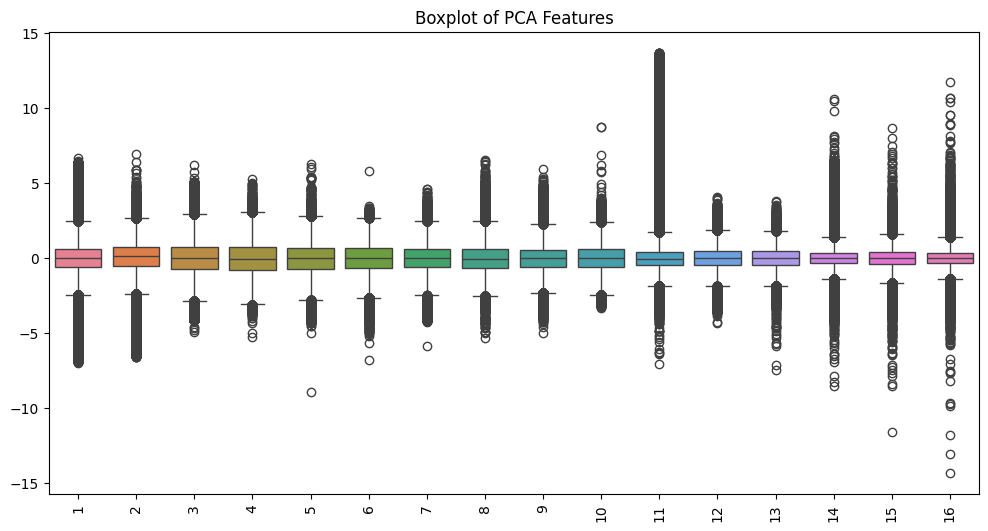

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_final.iloc[:, 1:17])  # Check V1-V28 again
plt.xticks(rotation=90)
plt.title("Boxplot of PCA Features")
plt.show()

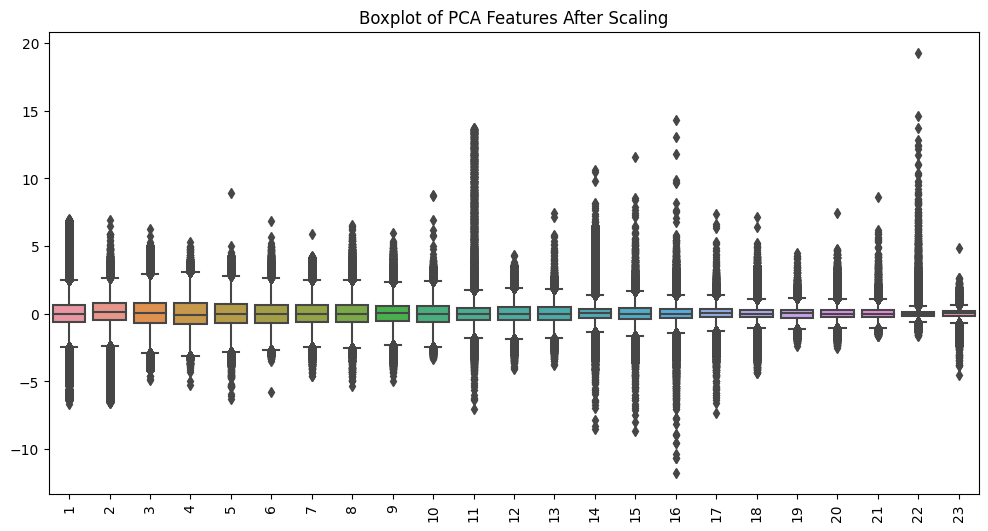

In [27]:
df["Class"].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [28]:
print('Not Fraud', round(df['Class'].value_counts()[0]/len(df) * 100,2))
print('Fraud', round(df['Class'].value_counts()[1]/len(df) * 100,2))

Not Fraud 99.83
Fraud 0.17


Text(0.5, 1.0, 'Class Distributions \n (0: Not Fraud || 1: Fraud)')

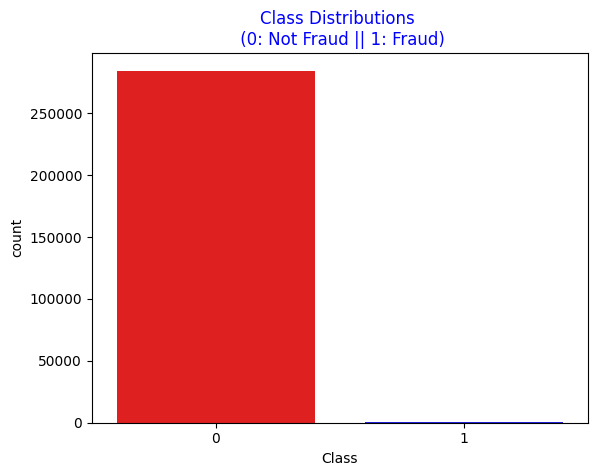

In [13]:
sns.countplot('Class', data=df, palette=["red","blue"])
plt.title('Class Distributions \n (0: Not Fraud || 1: Fraud)', fontsize=12, color="Blue")

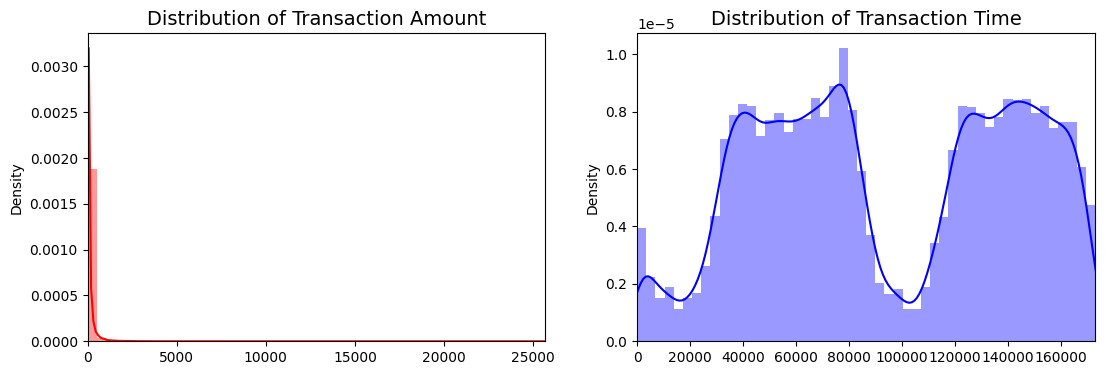

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(13,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

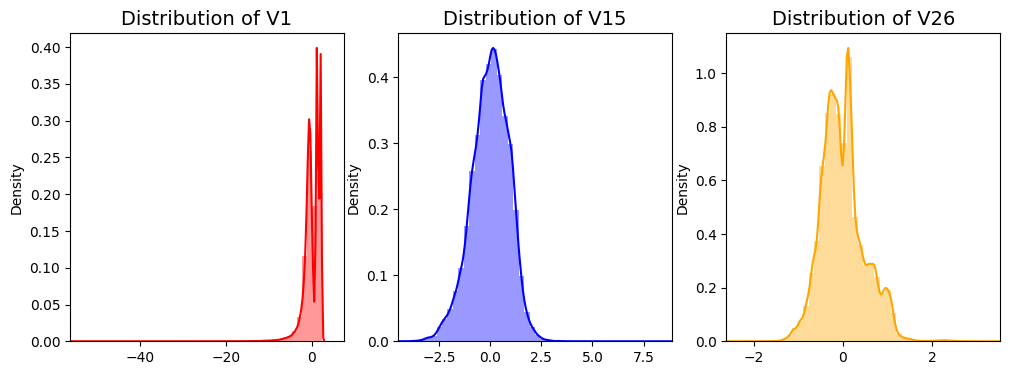

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
V1_values = df["V1"].values
V15_values = df["V15"].values
V26_values = df["V26"].values

sns.distplot(V1_values, ax=ax[0], color="red")
ax[0].set_title('Distribution of V1', fontsize=14)
ax[0].set_xlim([min(V1_values), max(V1_values)*3])

sns.distplot(V15_values, ax=ax[1], color="blue")
ax[1].set_title('Distribution of V15', fontsize=14)
ax[1].set_xlim([min(V15_values), max(V15_values)])

sns.distplot(V26_values, ax=ax[2], color="orange")
ax[2].set_title('Distribution of V26', fontsize=14)
ax[2].set_xlim([min(V26_values), max(V26_values)])

plt.show()

In [16]:

scaler = StandardScaler()
df["scaled_amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df["scaled_time"] = scaler.fit_transform(df["Time"].values.reshape(-1, 1))
df.drop(["Time", "Amount"], axis=1, inplace=True)

In [17]:
X = df.drop("Class", axis=1)
y = df["Class"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

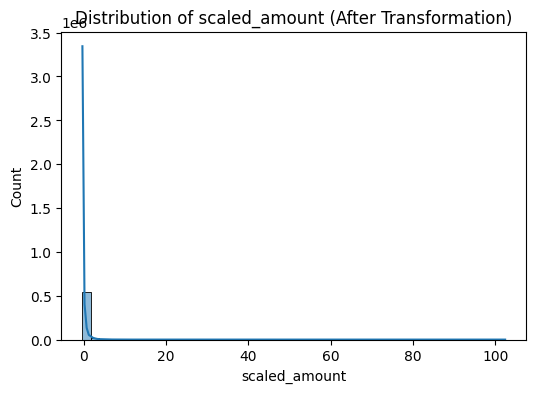

In [29]:
# Plot the distribution of Log_Amount
plt.figure(figsize=(6, 4))
sns.histplot(X_resampled['scaled_amount'], bins=50, kde=True)
plt.title("Distribution of scaled_amount (After Transformation)")
plt.show()


Class distribution after SMOTE:
 0    227451
1     45490
Name: Class, dtype: int64


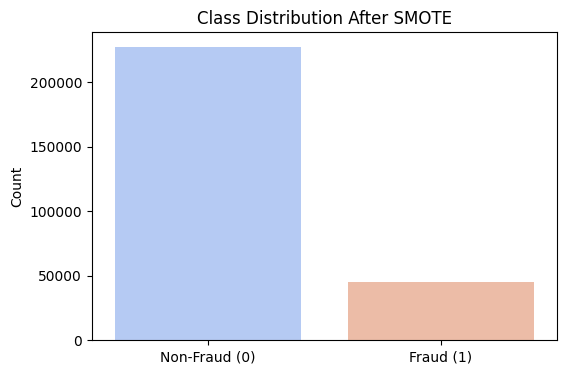

In [18]:
# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Adjust ratio if needed
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts())

# Plot new class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=pd.Series(y_train_smote).value_counts().index,
            y=pd.Series(y_train_smote).value_counts().values, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Non-Fraud (0)", "Fraud (1)"])
plt.ylabel("Count")
plt.title("Class Distribution After SMOTE")
plt.show()

In [19]:
y_train_smote.value_counts()[0]/len(y_train_smote)

0.8333339439659121

In [20]:
y_train_smote.value_counts()[1]/len(y_train_smote)

0.16666605603408796

In [21]:
print('Not Fraud', round(pd.Series(y_train_smote).value_counts()[0]/len(y_train) * 100,2))
print('Fraud', round(pd.Series(y_train_smote).value_counts()[1]/len(y_train) * 100,2))

Not Fraud 99.83
Fraud 19.97


In [22]:

# Initialize RobustScaler
scaler = RobustScaler()

# Apply scaling only to 'Time' and 'Amount'
X_train_smote[['Time', 'Amount']] = scaler.fit_transform(X_train_smote[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

# Check transformed statistics
print("\nScaled 'Time' and 'Amount' statistics:\n", X_train_smote[['Time', 'Amount']].describe())

KeyError: "None of [Index(['Time', 'Amount'], dtype='object')] are in the [columns]"

In [ ]:
# Log transform the 'Amount' column to reduce skewness
X_train_smote['Log_Amount'] = np.log1p(X_train_smote['Amount'])
X_test['Log_Amount'] = np.log1p(X_test['Amount'])

# Drop the original 'Amount' column if needed
X_train_smote.drop(columns=['Amount'], inplace=True)
X_test.drop(columns=['Amount'], inplace=True)

# Check the new features
print(X_train_smote.head())


       Time        V1        V2        V3        V4        V5        V6  \
0  0.902299  1.946747 -0.752526 -1.355130 -0.661630  1.502822  4.024933   
1  0.467741  2.035149 -0.048880 -3.058693  0.247945  2.943487  3.298697   
2 -0.498892 -0.991920  0.603193  0.711976 -0.992425 -0.825838  1.956261   
3  0.562296  2.285718 -1.500239 -0.747565 -1.668119 -1.394143 -0.350339   
4 -0.288031 -0.448747 -1.011440  0.115903 -3.454854  0.715771 -0.147490   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -1.479661  1.139880  1.406819  ...  0.076197  0.297537  0.307915  0.690980   
1 -0.002192  0.674782  0.045826  ...  0.038628  0.228197  0.035542  0.707090   
2 -2.212603 -5.037523  0.000772  ... -2.798352  0.109526 -0.436530 -0.932803   
3 -1.427984  0.010010 -1.118447  ... -0.139670  0.077013  0.208310 -0.538236   
4  0.504347 -0.113817 -0.044782  ... -0.243245 -0.173298 -0.006692 -1.362383   

        V25       V26       V27       V28  Hour  Log_Amount  
0 -0.3

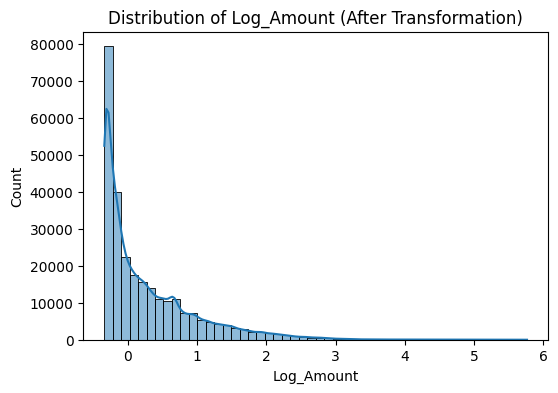

In [ ]:
# Plot the distribution of Log_Amount
plt.figure(figsize=(6, 4))
sns.histplot(X_train_smote['Log_Amount'], bins=50, kde=True)
plt.title("Distribution of Log_Amount (After Transformation)")
plt.show()

## sine and cosine encoding to capture the cyclical nature

In [ ]:

# Apply cyclical transformation
X_train_smote["Hour_sin"] = np.sin(2 * np.pi * X_train_smote["Hour"] / 24)
X_train_smote["Hour_cos"] = np.cos(2 * np.pi * X_train_smote["Hour"] / 24)

X_test["Hour_sin"] = np.sin(2 * np.pi * X_test["Hour"] / 24)
X_test["Hour_cos"] = np.cos(2 * np.pi * X_test["Hour"] / 24)


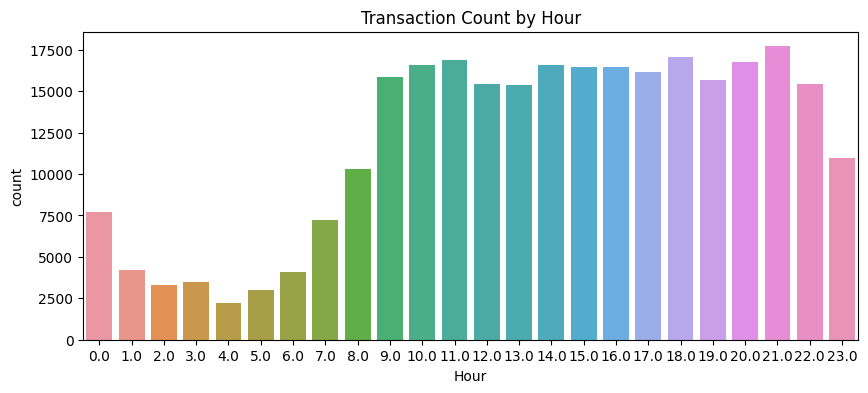

In [ ]:
# Plot the number of transactions by Hour
plt.figure(figsize=(10, 4))
sns.countplot(x=df['Hour'])
plt.title("Transaction Count by Hour")
plt.show()

### Drop the original Hour column since it's no longer needed:

In [ ]:
X_train_smote.drop(columns=["Hour"], inplace=True)
X_test.drop(columns=["Hour"], inplace=True)


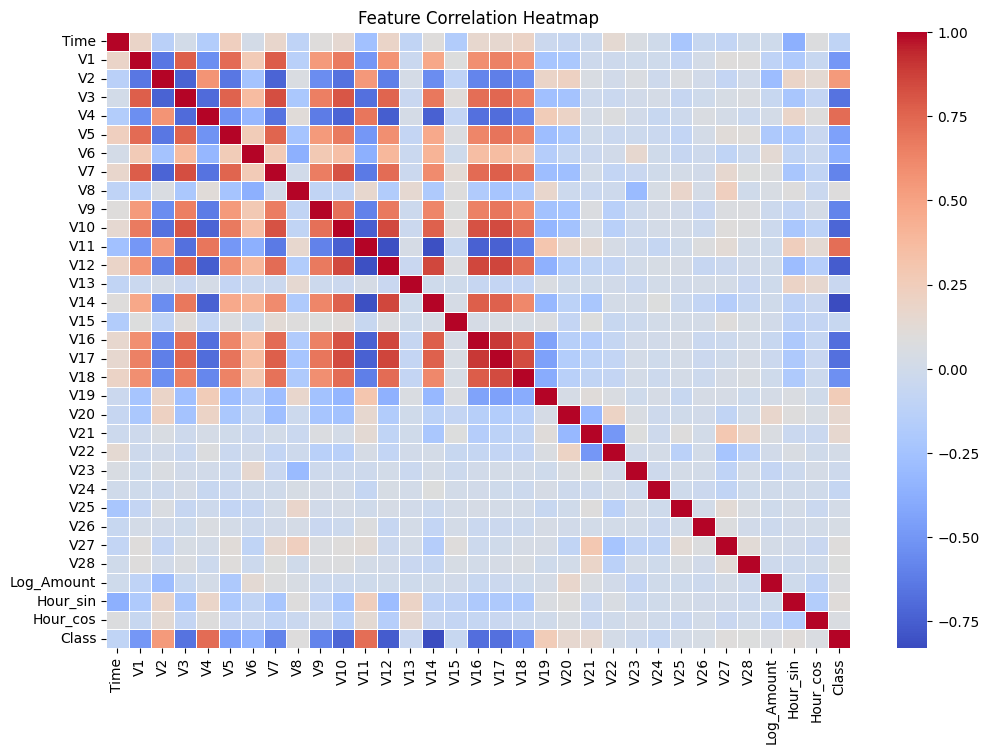

In [ ]:
X_train_smote['Class'] = y_train_smote

# Compute correlation matrix
correlation_matrix = X_train_smote.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:

# Compute correlation with fraud target
corr = X_train_smote.corr()['Class'].sort_values(ascending=False)

# Show top 10 most correlated features
print("\nTop 20 Most Correlated Features with Fraud:\n", corr.head(25))



Top 20 Most Correlated Features with Fraud:
 Class         1.000000
V4            0.722671
V11           0.720326
V2            0.536272
V19           0.258934
V21           0.156033
V20           0.155331
Hour_sin      0.104447
V27           0.094824
V8            0.090427
V28           0.081518
Log_Amount    0.065768
Hour_cos      0.060504
V26           0.038414
V22           0.015707
V25           0.014475
V23          -0.020240
V13          -0.045972
V15          -0.051664
V24          -0.064893
Time         -0.094894
V6           -0.356817
V5           -0.443242
V1           -0.493908
V18          -0.532043
Name: Class, dtype: float64


## 1️⃣ Drop Low-Correlation Features
If a feature has very low correlation (< |0.05|), it might not help much in the model.
Candidates to drop:

V26 (0.038)

V22 (0.015)

V25 (0.014)  

V23 (-0.020)

V13 (-0.045)


Time (-0.094) (since it's redundant after extracting Hour)

In [ ]:
# Drop low-correlation features
low_corr_features = ['V26', 'V22', 'V25', 'V23', 'V13', 'Time']
X_train_smote.drop(columns=low_corr_features, inplace=True)
X_test.drop(columns=low_corr_features, inplace=True)

print("Final shape of training data:", X_train_smote.shape)
print("Final shape of test data:", X_test.shape)


Final shape of training data: (272941, 27)
Final shape of test data: (56962, 26)


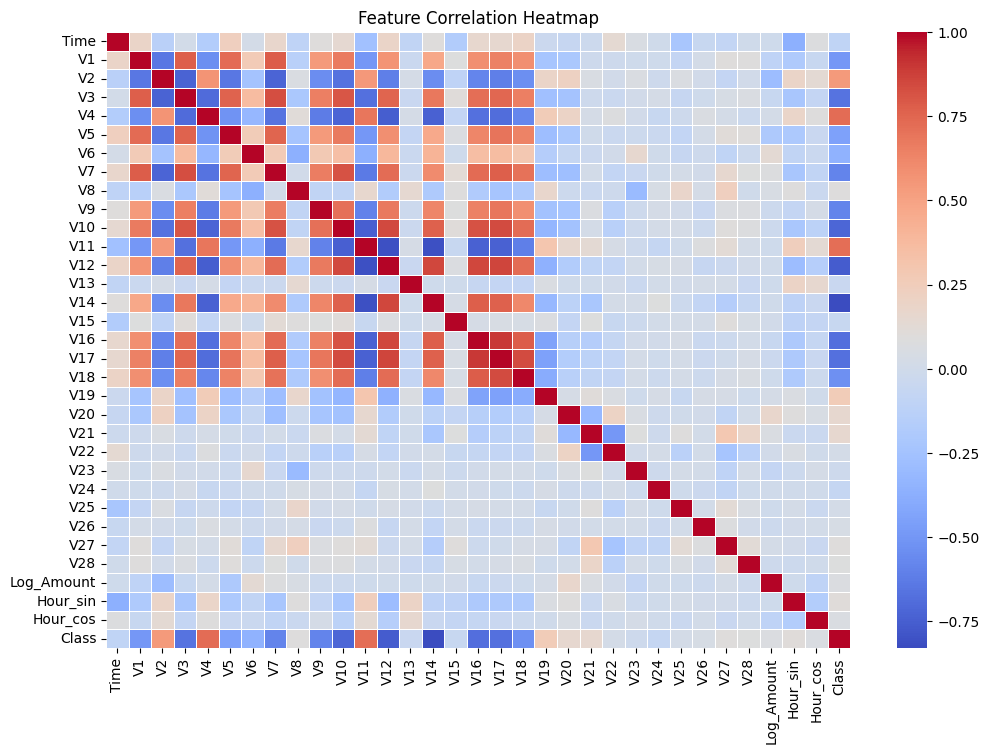

[('V14', 'V12'), ('V16', 'V12'), ('V17', 'V12'), ('V17', 'V16')]
V!2, V14, V16,V17

## 🔍 Key Insights from the Heatmap
Diagonal Line:

The strong red diagonal represents each feature’s perfect correlation with itself (1.0 correlation).
Highly Correlated Features:

Features like V4, V11, and V2 show strong correlation with fraud (confirming our previous findings).

Some features (like V10-V15) seem to be highly correlated with each other (potential multicollinearity).

Weak or Negative Correlation Features:

Some features show little to no correlation (grayish-blue colors), making them potential candidates for removal.

## 🛠 What Should You Do Next?

✅ 1️⃣ Remove Highly Correlated Features (Multicollinearity Check)

Features that are highly correlated with each other (>|0.85|) can cause issues for models like Logistic Regression & SVM.

We should check for feature pairs with high correlation and drop one of them.

In [ ]:
X_train_smote2 = X_train_smote.copy()

In [ ]:
# Compute the absolute correlation with the target column
target_corr = correlation_matrix['Class'].abs()

# Select upper triangle of correlation matrix to avoid redundancy
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find pairs of features with correlation greater than 0.85
high_corr_pairs = []
for column in upper.columns:
    high_corr_pairs += [(column, other) for other in upper.index if upper[column][other] > 0.85]

# For each pair of highly correlated features, drop the one with lower correlation to the target
columns_to_drop = []
for feature1, feature2 in high_corr_pairs:
    if abs(target_corr[feature1]) < abs(target_corr[feature2]):
        columns_to_drop.append(feature1)
    else:
        columns_to_drop.append(feature2)

# Drop the selected columns from X_train_smote
X_train_smote.drop(columns=columns_to_drop, inplace=True)

# Print the results
print("Dropped features:", columns_to_drop)
print("Final shape of dataset:", X_train_smote.shape)

Dropped features: ['V12', 'V16', 'V17', 'V17']
Final shape of dataset: (272941, 24)


In [ ]:
high_corr_pairs

[('V14', 'V12'), ('V16', 'V12'), ('V17', 'V12'), ('V17', 'V16')]

Dropped features: ['V12', 'V16', 'V17', 'V17']
Final shape of dataset: (272941, 24)

In [ ]:
X_train_smote.drop(columns=['Class'], inplace=True)

In [ ]:
X_train_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272941 entries, 0 to 272940
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   V1          272941 non-null  float64
 1   V2          272941 non-null  float64
 2   V3          272941 non-null  float64
 3   V4          272941 non-null  float64
 4   V5          272941 non-null  float64
 5   V6          272941 non-null  float64
 6   V7          272941 non-null  float64
 7   V8          272941 non-null  float64
 8   V9          272941 non-null  float64
 9   V10         272941 non-null  float64
 10  V11         272941 non-null  float64
 11  V14         272941 non-null  float64
 12  V15         272941 non-null  float64
 13  V18         272941 non-null  float64
 14  V19         272941 non-null  float64
 15  V20         272941 non-null  float64
 16  V21         272941 non-null  float64
 17  V24         272941 non-null  float64
 18  V27         272941 non-null  float64
 19  V2

## ✅ 2️⃣ Feature Scaling (StandardScaler vs RobustScaler)

Since your dataset contains fraudulent transactions with extreme values, RobustScaler might work better than StandardScaler.

Comparison:

StandardScaler: Scales data to have mean=0 and standard deviation=1. Works well if data is normally distributed.

RobustScaler: Uses the median and interquartile range, making it resistant to outliers.

In [ ]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

### StandardScaler (Z-score normalization)
Recommended if your features are normally distributed.
Centers the data around zero with unit variance.
Works well with models that assume Gaussian distributions, such as logistic regression or neural networks.

### RobustScaler (Scaling using median and IQR)
Better for datasets with outliers, which are common in fraud detection.
Uses the median and interquartile range, making it less sensitive to extreme values.
If your dataset has a lot of skewed features, you might also consider MinMaxScaler, but it's more sensitive to outliers.

In [ ]:
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))


In [ ]:
df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]
